### Today Concept
* Dimensionality Reduction
* Saving/Reading ml model for future use

#### Dimensionality Reduction
    reducing the dimension of the features is called the dimensionality reducting

1. Feature Elimination
2. Feature Extraction

**Feature Elimination**
    removing the unimportant features and only taking the important features

**Feature Extraction**
    creating new independent features from the existing features

we have only 2 columns **product_price** and **number_of_products**

```total_price  = product_price * number_of_products```

**Advantages**
1. by combining the features we can not loose much information
2. by reducing the features our model able to learn and work well

**Principal Component Analysis(PCA)**

it is the technique for the feature extraction

each of new feature/component after PCA are all the independent

**we can observe the breast cancer dataset without PCA and PCA**

**1. Get the data**

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.shape

(569, 31)

In [7]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [10]:
X = df.drop('target',axis=1)
X.shape

(569, 30)

In [11]:
y = df['target']
y.shape

(569,)

we may apply Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()

we may split the dataset for training and testing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [16]:
X_train.shape

(398, 30)

In [17]:
X_test.shape

(171, 30)

In [18]:
model.fit(X_train,y_train)

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**test the model**

In [19]:
print("training score",model.score(X_train,y_train)*100)

training score 95.22613065326632


In [20]:
print('testing score',model.score(X_test,y_test)*100)

testing score 96.49122807017544


**How many features we are taken for this model?**

all 30 featues

##### we apply PCA for breast cancer dataset

In [21]:
from sklearn.datasets import load_breast_cancer

In [22]:
data = load_breast_cancer()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [27]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

before apply PCA we have to stanardize the data

**step-1** import standardscaler

In [29]:
from sklearn.preprocessing import StandardScaler

**step-2**
create the object for the standard scaler

In [30]:
scaler = StandardScaler()

**step-3**   transform the data features only

In [31]:
X = df.drop('target',axis=1)
y = df['target']

split the data for training and testing

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

```scaled_features = scaler.fit_transform(features)```

In [34]:
X_train_transformed = scaler.fit_transform(X_train)

```scaled_features_test = scaler.transform(test_features)```

In [35]:
X_test_tranformed = scaler.transform(X_test)

Now we have to apply PCA

**step-1**

In [36]:
from sklearn.decomposition import PCA

**step-3**

while creating object for PCA we have to provide number of components

In [37]:
pcaObj = PCA(n_components=2)

**step-3**

```new_feature = pcaObj.fit_transform(X_train_transformed)```

In [38]:
pca_train_features = pcaObj.fit_transform(X_train_transformed)

In [39]:
pca_test_features = pcaObj.transform(X_test_tranformed)

**How much information carried from original features to new features?**

In [41]:
pcaObj.explained_variance_ratio_ * 100

array([44.11779009, 19.54106585])

In [42]:
sum(pcaObj.explained_variance_ratio_ * 100)

63.65885593429975

**with the help of new features/components we check the score**

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()

In [45]:
model.fit(pca_train_features,y_train)

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**test the model**

In [46]:
print('training score',model.score(pca_train_features,y_train)*100)

training score 94.9748743718593


In [47]:
print('testing score',model.score(pca_test_features,y_test)*100)

testing score 94.73684210526315


**visualisation of cancer data**


we want cancer data seperatly and non-cancer data seperately

convert ```pca_train_features``` into dataframe?

In [51]:
df1 = pd.DataFrame(pca_train_features)
df1.head()

,0,1
0,-3.199973,-0.752054
1,-1.669755,1.757481
2,1.159116,2.655842
3,-2.177872,1.296835
4,-2.210916,-1.799552


In [52]:
df2 = pd.DataFrame(pca_test_features)
df2.head()

,0,1
0,-0.788613,-2.098097
1,0.638698,0.733280
2,-4.690726,-3.172398
3,-1.464675,1.615717
4,-2.045641,-0.219232


we have to combine df1 and df2?

In [53]:
df1.shape

(398, 2)

In [54]:
df2.shape

(171, 2)

In [56]:
df = pd.concat([df1,df2])
df.shape

(569, 2)

In [58]:
y_ = pd.concat([y_train,y_test])

In [59]:
df['target'] = y_

In [60]:
df

,0,1,target
0,-3.199973,-0.752054,0
1,-1.669755,1.757481,0
2,1.159116,2.655842,0
3,-2.177872,1.296835,0
4,-2.210916,-1.799552,0
5,-1.962904,0.789264,0
6,-1.525190,0.303799,0
7,6.326668,8.210091,0
8,4.598991,-0.632740,0
9,4.077596,-4.859592,0


to plot the cancer and non-cancer data we have to filter cancer data as well as non-cancer data

In [61]:
cancer_df = df[df['target']==1]
cancer_df['target'].value_counts()

1    307
Name: target, dtype: int64

In [62]:
non_cancer_df = df[df['target']==0]
non_cancer_df['target'].value_counts()

0    262
Name: target, dtype: int64

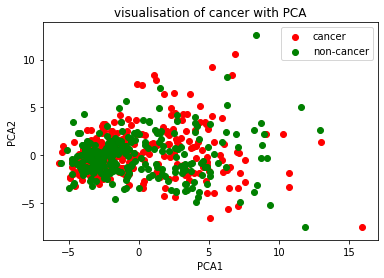

In [72]:
plt.figure()
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('visualisation of cancer with PCA')
plt.scatter(cancer_df[0],cancer_df[1],c='red',label='cancer')
plt.scatter(non_cancer_df[0],non_cancer_df[1],c='green',label='non-cancer')
plt.legend()
plt.show()

#### Saving/reading the model for future use

How to save this model for future use?

In [66]:
import pickle

```pickle.dump(model,file_object)```

In [67]:
pickle.dump(model,open('cancerModel.pkl','wb'))

### how to read model from external file

In [68]:
import pickle

```pickle.load(file_object)```

In [69]:
newModel = pickle.load(open('cancerModel.pkl','rb'))

In [70]:
newModel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
newModel.predict([[3.183412,4.269422]])

array([0])

1. Towardsdatascience
2. Analyticsvidya
3. kaggle
4. coursera